In [1]:
# 1. Input Layer -- CNN / Dense Layer / Convulated Layer
#     i. ReLU layer
#     ii. Pooling Layer
    #     iii. Upsampling

#     i. batchNormalization
#     ii. Dropout Layer


# 2. Hidden layer -- NN
# 3. Output Layer -- FCNN

In [2]:
# 1. Tensorflow
# 2. Pytroch
# 3. MaxNet

# 1. Numpy
# 2. Pandas
# 3. Pillow
# 4. OpenCV
# 5. Scikit Learn


# i. Plotly
# ii. matplotlib
# iii. Seaborn

# iv. D3.js

# 6. NLTK

<h4> <code>Importing Library</code></h4>


``` python

for i in range(10):
    print(i)
print("This is For Loop")

```

In [3]:
# This section for model 
import tensorflow as tf
# This section for algebric analysis
import numpy as np
# This section for visualization
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
# help(warnings.filterwarnings)

In [5]:
# value = dict({"product_price1" : 10,
#          "product_price2" :100})

In [6]:
# 1. Random: import random as rnd
# 2. Numpy; import numpy.random as npr
# 3. Tensorflow: import tensorflow.random

In [7]:
class NeuralNetwork:
    def __init__(self, layers):
        self.layers = layers
        self.L = len(layers)
        
        self.number_feature = layers[0] #1st layer --> input layer which contain number of features .
        self.number_class = layers[-1]  # last  layer --> output layer which contain number of class
        
        self.W = {}
        self.b = {}
        
        self.dw = {}
        self.db = {}
        
        self.setup()
    
    def setup(self):
        for i in range(1, self.L):  # starting from 1 --> means excluding input layer.
            self.W[i] = tf.Variable(tf.random.normal(shape = (self.layers[i], self.layers[i-1])))
            self.b[i] = tf.Variable(tf.random.normal(shape = (self.layers[i], 1)))
            #https://www.youtube.com/watch?v=f2XeQO9zz5g

In [8]:
tf_test1 = tf.random.normal(shape =(5,4))
tf_test1

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[ 0.5701197 ,  0.734655  , -1.5433662 ,  0.64486474],
       [ 0.8350151 ,  0.6646004 , -0.7111843 ,  1.6397675 ],
       [-1.3905807 ,  0.23361489, -0.7605132 ,  0.45603532],
       [-1.2408183 , -1.0022004 , -0.53665453, -0.9406085 ],
       [-0.9778573 , -0.77870256, -1.178599  ,  0.17997819]],
      dtype=float32)>


In TensorFlow, tf.random.normal is a function that generates random values from a normal distribution. It takes the shape of the desired tensor as an argument and returns a tensor with random values drawn from the specified distribution.

When initializing the weights of a neural network, it is common to use random values to break the symmetry and ensure that each neuron learns different features. In this case, tf.random.normal generates random values from a normal distribution, which is a common choice for weight initialization.

However, just using tf.random.normal(shape=(self.layers[i], self.layers[i-1])) directly would only generate the random values once, and those values would remain fixed throughout the training process. This means that every time you run your model, it would have the same initial weights, which could limit the model's ability to learn and generalize well.

By wrapping the tf.random.normal call inside a tf.Variable function, you create a TensorFlow variable object. TensorFlow variables are mutable and can be updated during training through backpropagation. This means that the initial random weights will be adjusted and optimized based on the training data.

In summary, using tf.Variable(tf.random.normal(shape=(self.layers[i], self.layers[i-1]))) allows the weights to be trainable variables that can be updated during the training process, while using tf.random.normal alone would generate fixed random values that cannot be optimized.

In [9]:
tf_test1 = tf.random.normal(shape =(5,4))
print(tf_test1)

tf_test1

tf.Tensor(
[[ 0.46636936  0.5464928  -0.8455858   2.0930622 ]
 [ 0.33592987 -0.16007     0.28355238 -0.9253378 ]
 [ 0.8628007   0.22461192 -1.4170283   1.4866781 ]
 [-0.9365028   0.81116843  1.3325727   0.48442033]
 [ 0.41550353 -0.9005528  -0.16104273  1.0513816 ]], shape=(5, 4), dtype=float32)


<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[ 0.46636936,  0.5464928 , -0.8455858 ,  2.0930622 ],
       [ 0.33592987, -0.16007   ,  0.28355238, -0.9253378 ],
       [ 0.8628007 ,  0.22461192, -1.4170283 ,  1.4866781 ],
       [-0.9365028 ,  0.81116843,  1.3325727 ,  0.48442033],
       [ 0.41550353, -0.9005528 , -0.16104273,  1.0513816 ]],
      dtype=float32)>

In [10]:
tf_test1

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[ 0.46636936,  0.5464928 , -0.8455858 ,  2.0930622 ],
       [ 0.33592987, -0.16007   ,  0.28355238, -0.9253378 ],
       [ 0.8628007 ,  0.22461192, -1.4170283 ,  1.4866781 ],
       [-0.9365028 ,  0.81116843,  1.3325727 ,  0.48442033],
       [ 0.41550353, -0.9005528 , -0.16104273,  1.0513816 ]],
      dtype=float32)>

In [11]:
tf_var_test1 = tf.Variable(tf.random.normal(shape =(5,4)))
print(tf_var_test1)

<tf.Variable 'Variable:0' shape=(5, 4) dtype=float32, numpy=
array([[ 1.2326028 ,  1.7693336 ,  1.4069145 , -0.01120733],
       [-0.00767345, -0.8049907 ,  0.02885542,  0.8942153 ],
       [ 0.10200084, -1.2533019 , -1.0208926 ,  0.99893403],
       [ 1.3369433 ,  0.4435176 ,  1.221152  , -0.976061  ],
       [ 0.0209658 , -1.828335  ,  0.45601094, -0.74310756]],
      dtype=float32)>


In [12]:
tf_var_test1

<tf.Variable 'Variable:0' shape=(5, 4) dtype=float32, numpy=
array([[ 1.2326028 ,  1.7693336 ,  1.4069145 , -0.01120733],
       [-0.00767345, -0.8049907 ,  0.02885542,  0.8942153 ],
       [ 0.10200084, -1.2533019 , -1.0208926 ,  0.99893403],
       [ 1.3369433 ,  0.4435176 ,  1.221152  , -0.976061  ],
       [ 0.0209658 , -1.828335  ,  0.45601094, -0.74310756]],
      dtype=float32)>

```python
Here's a summary of the concepts we discussed:

Classes: Classes are blueprints or templates in object-oriented programming that define the properties (attributes) and behaviors (methods) of objects.

__init__ Method: __init__ is a special method called the constructor. It is automatically invoked when you create a new instance (object) of a class. It initializes the object's attributes or performs setup operations.

Instance: An instance refers to a specific occurrence or individual occurrence of a class. It is an object created from a class and represents a unique entity with its own set of attributes and behaviors.

Attributes: Attributes are variables associated with an instance of a class. They store data specific to that instance.

self: self is a reference to the instance of the class itself. It is used within the class to access and modify its own attributes and methods.

Example: In the context of a NeuralNetwork class, you can create instances of neural networks with different layer configurations. Each instance will have its own layers attribute and the __init__ method will initialize the object with the provided layers.

Example code snippet:

python
Copy code
class NeuralNetwork:
    def __init__(self, layers):
        self.layers = layers

# Create instances of the NeuralNetwork class
network1 = NeuralNetwork([3, 5, 2])
network2 = NeuralNetwork([4, 6, 3])

print(network1.layers)  # Output: [3, 5, 2]
print(network2.layers)  # Output: [4, 6, 3]

```

In [13]:
# 1. dtype="float32"
# 2. dtype=np.float32
# 3. dtype=tf.float32
# 4. dtype=torch.float32

In the given code snippet, the line A = tf.convert_to_tensor(A, dtype=tf.float32) converts the input dataset A into a TensorFlow tensor with the data type set to float32. This step is necessary to ensure consistency and compatibility with the subsequent computations performed in the forward pass.

There are a few reasons why specifying the data type can be important:

Numerical precision: Different data types have different levels of numerical precision. For example, float32 uses 32 bits to represent a floating-point number, whereas float16 uses 16 bits. By default, TensorFlow uses float32 as the standard data type, which provides a good balance between precision and memory usage. If you don't explicitly specify the data type, TensorFlow will use the default float32.

Computation performance: TensorFlow can optimize computations based on the specified data type. For example, some hardware accelerators, such as GPUs, are more efficient when working with certain data types. By specifying the data type, you allow TensorFlow to leverage these optimizations and potentially improve the performance of your forward pass.

Consistency with other layers: When building a neural network, it is important to ensure that the data types of inputs and weights are consistent across different layers. Specifying the data type explicitly helps enforce this consistency and prevents potential errors or inconsistencies in the computations.

In summary, specifying the data type, such as float32, in the forward pass ensures numerical precision, computational performance, and consistency in the computations performed by the neural network.

In [14]:
# Forward propagation

class NeuralNetwork(NeuralNetwork):
    def forwardPass(self, A):
        A = tf.convert_to_tensor(A, dtype=tf.float32)
        for i in range(1, self.L):
            Z = tf.matmul(A, tf.transpose(self.W[i]))+ tf.transpose(self.b[i])  ##The tf.matmul function performs matrix multiplication between these two matrices A, tf.transpose(self.W[i])
            if i!= self.L-1: #exclding output layer
                A = tf.nn.relu(Z)
            else:
                A = Z
        return A

```python
for i in range(1, self.L):
            Z = tf.matmul(A, tf.transpose(self.W[i])) + tf.transpose(self.b[i])
            if i!= self.L-1: #exclding output layer
                A = tf.nn.relu(Z)
            else:
                A = Z



here  else:
                A = Z will executed only when the output layer comes , right??
ChatGPT
Yes, you are correct. In the provided code snippet, the line A = Z inside the else statement will only be executed when the loop variable i reaches the value of self.L - 1, which corresponds to the output layer.

```

In [15]:
(3+ 4+ 5)/(3)

4.0

In [16]:
# We will use this section for computing loss and Upgrading the previous parameters
class NeuralNetwork(NeuralNetwork):
    def compute_loss(self, A, Y):
        return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(Y, A)) # it will return an tensor value
        #The function softmax_cross_entropy_with_logits(Y, A) in TensorFlow calculates 
        # the softmax cross-entropy loss between the predicted logits A and the true labels Y.
        # This function is commonly used in multi-class classification tasks, where each input can belong to only one class.
    
    def upgarde_parameters(self, lr):
        for j in range(1, self.L):
            self.W[j].assign_sub(lr*self.dw[j])
            self.b[j].assign_sub(lr*self.db[j])

Yes, that's correct. The expression tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(Y, A)) will return a single scalar value.

The tf.reduce_mean function takes a tensor as input and computes the mean value of its elements. In this case, the input tensor is the result of tf.nn.softmax_cross_entropy_with_logits(Y, A), which calculates the softmax cross-entropy loss between the predicted logits A and the true labels Y.

The tf.nn.softmax_cross_entropy_with_logits function returns a tensor of individual loss values, typically one loss value per example in the batch. These individual loss values represent the dissimilarity between the predicted probabilities and the true labels for each example.

By applying tf.reduce_mean to the tensor of individual loss values, the function calculates the average loss across all examples in the batch. The output of tf.reduce_mean is a single scalar value that represents the mean loss value across the entire batch.

This average loss value is often used as a metric to evaluate the performance of the model during training or validation. It provides a single value that indicates how well the model is fitting the training data or generalizing to new data.

So, to summarize, the expression tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(Y, A)) returns a single scalar value, representing the average loss across all examples in the batch.






In [17]:
# 0 index --> cats
# 1 index --> dogs
np.argmax([0.12, 0.09])

0

![image.png](attachment:952c6216-d3df-4692-99f5-d553399d85b8.png)

In [18]:
class NeuralNetwork(NeuralNetwork):
    def predict(self, x):
        A = self.forwardPass(x)
        return tf.argmax(tf.nn.softmax(A), axis = 1)
    

    #get information about our network and layers
    def info(self):
        num_params = 0
        for i in range(1, self.L):
          #parameters --> weughts and biases
          #to calculate total number of weights and biases
            num_params += self.W[i].shape[0] * self.W[i].shape[1]
            num_params += self.b[i].shape[0]
            
        print("Number of Feaure: {}".format(self.number_feature))
        print("Total Number of Class is: {} ".format(self.number_class))
        
        print("Hidden Layer information is: ")
        for j in range(1, self.L -1):
            print("Layer: {}, Units {}".format(j, self.layers[j])) #Units means nodes
            
        print("Total Number of parameters : {}".format(num_params))

In [19]:
# history = model.fit()

![image.png](attachment:367fa0ce-a311-451d-901c-95005f7e4995.png)

In TensorFlow, the GradientTape is a fundamental tool for automatic differentiation. It records operations that are executed within its context, enabling the computation of gradients later on. Gradients are essential for training neural networks because they indicate the direction and magnitude of adjustments needed to minimize the loss function.

In [20]:
class NeuralNetwork(NeuralNetwork):
  #training on a single batch of data

    def training_on_batch(self, x, y, lr):
        x = tf.convert_to_tensor(x, dtype=tf.float32)
        y = tf.convert_to_tensor(y, dtype=tf.float32)
        #When you create a GradientTape object, it starts to "watch" any TensorFlow operations that are executed within its context.
        
        with tf.GradientTape(persistent=True) as tape:
          #You perform forward propagation by calling operations on TensorFlow tensors within the GradientTape context. In your code, this is done by calling self.forwardPass(x) to compute the output A of the neural network for a given input x.
            
            A = self.forwardPass(x)
          #Any operations involving TensorFlow tensors within the GradientTape context are recorded by the tape, creating a computational graph.

          #Next, you compute the loss by calling self.compute_loss(A, y). This operation involves TensorFlow tensors as well and is recorded by the tape.
            loss = self.compute_loss(A, y)
            #print('loss      -----   ',loss)
            

        #After the loss is computed, you can retrieve the gradients of the loss with respect to the trainable parameters (weights and biases) of your model. This is done using the tape.gradient(loss, variable) method, where loss is the value to differentiate and variable is the variable with respect to which the gradient is computed
        for key in self.W.keys():
            self.dw[key] = tape.gradient(loss, self.W[key])
            self.db[key] = tape.gradient(loss, self.b[key])
            
        del tape
        #The GradientTape is deleted to free up resources.
        
        self.upgarde_parameters(lr)
        
        return loss.numpy()

, if you have 1000 epochs and 10 batches defined, it means that during each epoch, all 10 batches will be executed.

In [21]:
# Trining Start
class NeuralNetwork(NeuralNetwork):
    def train(self, x_train, y_train, x_test, y_test, epochs, step_per_epochs, batch_size, lr):
        history = {"val_loss":[], 
                  'train_loss':[],
                  'val_acc':[]}
        
        
        for e in range(0, epochs):
            epochs_loss_train = 0.0
            print("Epochs {}".format(e), end = " | ") # e --> koto number epoch
            for i in range(step_per_epochs): #The term "steps per epoch" refers to the number of batches processed within a single epoch during training.
                
                x_batch = x_train[i*batch_size : (i+1)*batch_size]
                y_batch = y_train[i*batch_size : (i+1)*batch_size]
                
                batch_loss = self.training_on_batch(x_batch, y_batch, lr)
                epochs_loss_train += batch_loss
                
                
                if i %int(step_per_epochs/10) == 0:
                    print(end = " . ")
                    
            history['train_loss'].append(epochs_loss_train/step_per_epochs) #to calculate the average loss per epoch during training.


            #These lines calculate the validation loss and accuracy after each epoch. The model's forwardPass method is used to obtain predictions (valA) for the x_test data. The validation loss is computed using the compute_loss method with y_test and valA. The validation accuracy is calculated by comparing the predicted labels (valuePr) with the true labels (y_test). 
            #The results are appended to history['val_loss'] and history['val_acc'], respectively. The accuracy value is printed for monitoring purposes
            valA = self.forwardPass(x_test)
            history['val_loss'].append(self.compute_loss(y_test, valA).numpy())

            valuePr = self.predict(x_test)
            history['val_acc'].append(np.mean(np.argmax(y_test, axis=1) == valuePr.numpy()))
            print("Value Accuracy: ", history['val_acc'][-1])
        
        # Here we will get training innformation
        return history

In the provided code, the validation accuracy is calculated, not the test accuracy. The lines:

python
Copy code
valA = self.forwardPass(x_test)
history['val_loss'].append(self.compute_loss(y_test, valA).numpy())

valuePr = self.predict(x_test)
history['val_acc'].append(np.mean(np.argmax(y_test, axis=1) == valuePr.numpy()))
print("Value Accuracy: ", history['val_acc'][-1])
calculate the validation loss (val_loss) and validation accuracy (val_acc) for the current epoch using the validation data (x_test and y_test). The accuracy is calculated by comparing the predicted labels (valuePr) with the true labels (y_test). The validation accuracy is printed for monitoring purposes.

```python


 It prints a dot (.) every 10% of steps completed within an epoch.

Let's break down the code to understand its purpose:

python
Copy code
if i % int(steps_per_epoch / 10) == 0:
    print(end=" . ")
i represents the current step within an epoch.
steps_per_epoch is the total number of steps or batches in an epoch.
int(steps_per_epoch / 10) calculates 10% of the steps per epoch. The int() function ensures that the result is an integer.
The condition i % int(steps_per_epoch / 10) == 0 checks if the current step is a multiple of 10% of the steps per epoch.
Essentially, this code prints a dot every time the training progresses by 10% of steps within an epoch. It acts as a visual progress indicator for each epoch during training.

For example, if you have 1000 steps (batches) per epoch, the code will print a dot at steps 0, 100, 200, ..., 900, indicating the progress made during the epoch.

This progress indicator can be helpful to monitor the training process and get an idea of how far along the model is in each epoch. It provides a simple visual feedback to show that the training is ongoing.

```

In [22]:
# # a = np.array([1, 2, 3])
# # b= np.array([1, 4, 3])
# a == b

In [23]:
# for i, j in enumerate(range(23, 67)):
#     print(i, j)

A benchmark dataset, in the context of machine learning and artificial intelligence, refers to a standardized dataset that is widely used to evaluate and compare the performance of different algorithms and models. These datasets are often representative of real-world problems and are carefully curated to provide a fair and consistent basis for comparing different approaches.

The tf.keras.datasets.mnist.load_data() function is used to load the MNIST dataset, which is a popular benchmark dataset for handwritten digit recognition. MNIST stands for Modified National Institute of Standards and Technology database. It consists of a training set of 60,000 examples and a test set of 10,000 examples, where each example is a 28x28 grayscale image of a handwritten digit from 0 to 9.

Yes, in the MNIST dataset, each example refers to a single image of a handwritten digit.

In [24]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [25]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [26]:
#x_train[0] refers to the first image in the x_train array.
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [27]:
x_train[0].shape #28  by 28 gray scale image.

(28, 28)

In [ ]:
#The dimensions of a grayscale image refer to its width and height.
# a 28x28 matrix, which can be interpreted as a grayscale image with 28 rows and 28 columns. Each element in the matrix corresponds to the intensity value of a pixel in the image.

In [28]:
y_train[0]

5

In [29]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [30]:
y_train.shape

(60000,)

In [31]:
x_train.shape

(60000, 28, 28)

In [32]:
x_train.shape[0]

60000

In [33]:
28*28

784

In [ ]:
XXX = np.reshape(x_train, (x_train.shape[0], 784))

In [ ]:
XXX.shape

(60000, 784)

In [ ]:
XXX[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In the code snippet you provided, the shape of x_train is (60000, 28, 28), which indicates a 3D array rather than a 2D array. Each element in x_train represents a pixel value of an image.

In the given code, the reshaping operation is performed to transform the 3D array into a 2D array. The line x_train = np.reshape(x_train, (x_train.shape[0], 784)) reshapes the array by keeping the first dimension intact (x_train.shape[0] refers to the number of images, which is 60000 in this case) and combining the second and third dimensions into a single dimension of size 784.

By performing this reshaping operation, each image in x_train is flattened into a 1D array of length 784, representing a vectorized version of the image. This vectorization simplifies the input representation and makes it compatible with certain machine learning models that expect a 1D input.

So, to clarify, the reshaping operation in this code snippet transforms the 3D array x_train into a 2D array where each row represents a flattened image with 784 pixel values.

In [34]:
def loadDatasets():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    x_train = np.reshape(x_train, (x_train.shape[0], 784)) /255.0
    #np.reshape(x_train, (x_train.shape[0], 784)) reshapes x_train into a 2-dimensional array with dimensions (60000, 784).
    #. Here, x_train.shape[0] corresponds to the number of samples in the dataset, which is 60000,
    #784 represents the number of features or input dimensions in each sample.
    #Reshaping the array in this way flattens each image, transforming it from a 2D grid of size 28x28 to a 1D vector of size 784. 
    #This transformation is often done to facilitate further processing or to match the expected input shape of a machine learning model.
    #the division by 255.0 in the expression np.reshape(x_train, (x_train.shape[0], 784))/255.0 is likely performed to normalize the pixel values.
    # Dividing by 255 scales the pixel values to the range of 0 to 1, which is a common practice in image processing and machine learning tasks.

    y_train = tf.keras.utils.to_categorical(y_train)


    x_test = np.reshape(x_test, (x_test.shape[0], 784))/255.0
    y_test = tf.keras.utils.to_categorical(y_test)
    
    print("X Train Datasets Shape: {}".format(x_train.shape))
    print("Y test Data {}".format(y_test))
    print("Len of Y test Datasets: {}".format(len(y_test[0])))
    print("Unique value is : {}".format(np.argmax(y_test[1])))
    
    return (x_train, y_train), (x_test, y_test)





 

The transformation of a 2D grid of size 28x28 to a 1D vector of size 784 is often done to facilitate further processing or to match the expected input shape of a machine learning model. Here are a few reasons why this transformation is performed:

Consistent Input Shape: Many machine learning algorithms and models, such as fully connected neural networks, expect the input data to be in the form of a vector. By reshaping the input images into a 1D vector, we ensure that all images have a consistent input shape, regardless of their original dimensions. This allows the model to process the data efficiently.

Feature Extraction: In image processing and computer vision tasks, the individual pixels of an image often carry important information. By reshaping the image into a 1D vector, we create a feature vector where each element represents the intensity value of a specific pixel. This allows the model to learn and extract patterns or features from the images.

Dimensionality Reduction: Reshaping the image into a 1D vector reduces the dimensionality of the input. This can be beneficial in cases where the original 2D structure of the image is not essential for the task at hand, or when dealing with limited computational resources. Dimensionality reduction can help reduce the complexity of the model and speed up the training process.

Compatibility with Existing Models: Pre-trained models or libraries often expect inputs in a specific format. By reshaping the images into a 1D vector, we can make them compatible with existing models or utilize pre-trained models that are designed to work with flattened input data.

Overall, the transformation from a 2D grid to a 1D vector is a common preprocessing step in image-related machine learning tasks. It allows for easier data manipulation, compatibility with various models, and efficient extraction of features from the images.

Normalization of pixel values is a common practice in image processing and machine learning tasks for several reasons:

Improved Numerical Stability: Normalizing pixel values to a specific range, such as 0 to 1, helps improve numerical stability during computation. By scaling the values to a smaller range, it can prevent potential issues that may arise due to large or varying value ranges.

Equal Weightage: Normalization ensures that each pixel contributes equally to the overall image representation. When pixel values are in different ranges, some pixels may dominate the learning process due to their larger values, while others may have a negligible impact. Normalization helps to balance the contribution of each pixel and ensures fair treatment during the learning process.

Gradient Descent: Many machine learning algorithms, including neural networks, rely on gradient-based optimization techniques such as gradient descent to update model parameters. Normalizing pixel values can help the optimization process converge faster by providing a more well-behaved gradient landscape. It helps prevent the gradients from being dominated by large pixel values, which could slow down the learning process or cause instability.

Model Agnosticism: Normalization makes the input data more agnostic to the specific characteristics of the model or algorithm being used. It allows the same normalized data to be fed into different models or algorithms without requiring model-specific adjustments. This can be particularly useful when comparing or combining results from different models or when using pre-trained models.

Convergence and Performance: Normalization can help the model converge faster during training, leading to potentially better performance. It can help alleviate issues like vanishing or exploding gradients, which can hinder convergence and affect the overall learning process.

```python

```
In the context of image recognition tasks, such as MNIST, the target values represent the labels or categories of the images. For example, in the MNIST dataset, the target values represent the digits from 0 to 9.

One-hot encoding is a way to represent categorical data where each category is converted into a binary vector. In the case of MNIST, there are 10 possible categories (digits 0 to 9), so each target value is converted into a binary vector of length 10.

The purpose of one-hot encoding in image recognition tasks is to provide a suitable format for the output layer of a neural network model. Neural networks often use a softmax activation function in the output layer, which requires the target values to be in one-hot encoded format.

By converting the target values to one-hot encoded vectors, the neural network can effectively learn to predict the correct category for each image. It provides a consistent representation of the target values that the model can work with during the training process.

However, it's important to note that one-hot encoding is not always necessary for all types of classification tasks. Some classification problems may use different encoding schemes or may not require any encoding at all, depending on the specific requirements and the chosen model architecture.

If you have a numerical target variable, you can still perform CNN classification without converting it to one-hot encoded vectors. You would need to adjust the output layer of your model accordingly to handle the numerical target values directly.

```
 ```

  Let's dive deeper into why the numerical representation of labels may not be suitable for the softmax activation function in the output layer, using an example.

Consider the MNIST dataset, where each image is a 28x28 grayscale image of a handwritten digit. The goal is to train a neural network model to recognize and classify these digits into one of the ten categories (digits 0 to 9).

If we represent the labels using the numerical values from 0 to 9, we might have the following labels for a few images:

Image 1: Label = 3
Image 2: Label = 8
Image 3: Label = 1
To train a neural network model, we typically use one-hot encoding to transform these numerical labels into binary vectors. Let's apply one-hot encoding to these labels:

Image 1: Label = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
Image 2: Label = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
Image 3: Label = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Now, let's consider the softmax activation function, which is commonly used in the output layer of a neural network for multi-class classification tasks. The softmax function takes an input vector and produces an output vector where each element represents the probability of the input belonging to a specific class.

In the case of the MNIST dataset, the output layer of the neural network would have ten neurons, one for each digit category (0 to 9). The softmax activation function ensures that the output values are non-negative and sum up to 1, representing probabilities.

If we use the numerical labels directly, the output layer would receive a numerical value as the target, such as 3, 8, or 1. However, the softmax activation function expects the target values to be in the form of a probability distribution. It needs a consistent representation that assigns a probability to each class.

By using one-hot encoding, we provide this consistent representation. Each label is transformed into a binary vector where the true class is indicated by 1 and all other positions have 0. The softmax activation function can then generate a probability distribution over the classes based on these one-hot encoded labels.

For example, if we have an image of the digit 3, the corresponding label without one-hot encoding would be 3. However, after applying one-hot encoding, the label becomes [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]. The softmax activation function can now assign a probability to each class, indicating the likelihood of the input image belonging to each digit category.

In summary, the numerical representation of labels does not provide a suitable format for the softmax activation function in the output layer. By using one-hot encoding, we transform the labels into a consistent representation of probabilities for each class. This allows the neural network to learn and predict the probabilities of different classes accurately.

I hope this example provides a detailed understanding of why the numerical representation may not be suitable and how one-hot encoding helps in generating a probability distribution over the classes. If you have any further questions, please feel free to ask.

```python

The code snippet you provided is using the to_categorical function from the tf.keras.utils module to convert the labels in y_train into one-hot encoded vectors.

One-hot encoding is a technique used to represent categorical variables as binary vectors. In this case, y_train likely contains class labels for a classification problem. By using to_categorical, each label is converted into a binary vector where the index corresponding to the label is set to 1, and all other indices are set to 0.

Here's an example to illustrate the transformation:

Before one-hot encoding:

css
Copy code
y_train = [0, 1, 2, 1, 0]
After applying to_categorical:

makefile
Copy code
y_train = [[1, 0, 0],  # corresponds to class 0
           [0, 1, 0],  # corresponds to class 1
           [0, 0, 1],  # corresponds to class 2
           [0, 1, 0],  # corresponds to class 1
           [1, 0, 0]]  # corresponds to class 0
The resulting y_train is a numpy array or TensorFlow tensor where each label is now represented as a one-hot encoded vector. This encoding is often used as the target variable format when training neural networks for multi-class classification tasks.

Note that if y_train is already in one-hot encoded format, applying to_categorical would be unnecessary and may introduce undesired behavior.
```

In [35]:


def plot_random_sample(x, y, p = None):
    indicies = np.random.choice(range(0,  x.shape[0]), 10)
    y = np.argmax(y, axis=1)
    
    if p is None:
        p = y
        
    plt.figure(figsize=(10, 4))
    for i, index in enumerate(indicies):
        plt.subplot(2, 5, i+1)
        plt.imshow(x[index].reshape((28, 28)), cmap = 'binary')
        plt.xticks([])
        plt.yticks([])
        plt.gray()
        
        if y[index] == p[index]:
            col = 'g'
        else:
            col = 'r'
        plt.xlabel(str(p[index]), color = col)
        
    return plt

```python

Certainly! Let's go through the plot_random_sample function step by step:

Step 1: Randomly select indices

python
Copy code
indicies = np.random.choice(range(0, x.shape[0]), 10)
This line randomly selects 10 indices from the range of 0 to the number of data points in x. It uses the np.random.choice function from NumPy to perform the random selection without replacement.

Step 2: Convert one-hot encoded labels to class indices

python
Copy code
y = np.argmax(y, axis=1)
The argmax function is applied to y along axis=1. This operation returns the indices of the maximum values along the second dimension. It is used to convert one-hot encoded labels into their corresponding class indices.

Step 3: Check if p is None and assign y if so

python
Copy code
if p is None:
    p = y
This condition checks if the variable p is None. If it is None, it means that no predicted labels have been provided, so p is assigned the value of y (the true labels).

Step 4: Create a figure for plotting

python
Copy code
plt.figure(figsize=(10, 4))
This line creates a new figure for plotting the subplots. The figsize parameter specifies the size of the figure, with a width of 10 inches and a height of 4 inches.

Step 5: Plot each image and label in subplots

python
Copy code
for i, index in enumerate(indicies):
    plt.subplot(2, 5, i+1)
    plt.imshow(x[index].reshape((28, 28)), cmap='binary')
    plt.xticks([])
    plt.yticks([])
    plt.gray()
    
    if y[index] == p[index]:
        col = 'g'
    else:
        col = 'r'
    plt.xlabel(str(p[index]), color=col)
This loop iterates over each index selected in indicies. It sets up a subplot with plt.subplot(2, 5, i+1), which creates a 2x5 grid of subplots, and i+1 determines the position of each subplot within the grid.

Inside the loop, it plots the image corresponding to the data point at the selected index using plt.imshow. The cmap='binary' parameter specifies that the image should be displayed in black and white.

plt.xticks([]) and plt.yticks([]) remove the tick marks on the x and y axes.

plt.gray() sets the color scheme of the plot to grayscale.

Based on whether the true label (y[index]) matches the predicted label (p[index]), the label is displayed as text using plt.xlabel. If the labels match, the text color is set to green (col = 'g'), and if they don't match, the text color is set to red (col = 'r').

Step 6: Return the plot

python
Copy code
return plt
The function returns the plt object, which contains the plotted figure.

After calling the plot_random_sample function, you can display the plot by calling plt.show() or save it to a file using plt.savefig().
```

In [36]:
(x_train, y_train), (x_test, y_test) = loadDatasets()

X Train Datasets Shape: (60000, 784)
Y test Data [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Len of Y test Datasets: 10
Unique value is : 2


In [37]:
x_train.shape

(60000, 784)

In [38]:
x_train.shape[0]

60000

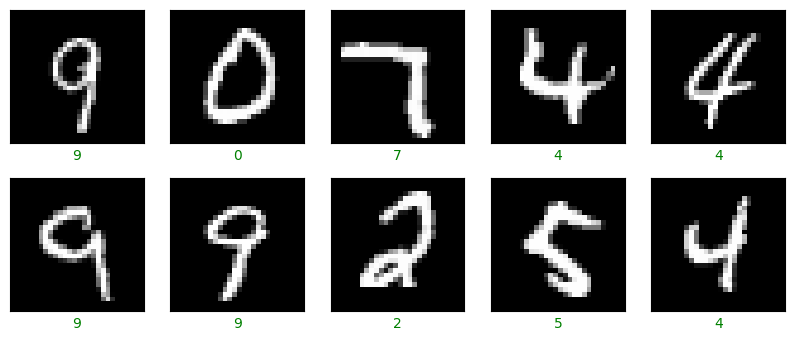

In [39]:
plot_random_sample(x_train, y_train).show()

In [40]:
def plot_results(history):
    plt.figure(figsize=(12, 4))
    epochs = len(history['val_loss'])
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), history['val_loss'], label='Val Loss')
    plt.plot(range(epochs), history['train_loss'], label='Train Loss')
    plt.xticks(list(range(epochs)))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    
    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), history['val_acc'], label='Val Acc')
    plt.xticks(list(range(epochs)))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    return plt

In [41]:
#network = NeuralNetwork([784,256, 256, 10])# 28*28 # 1st 256 Neuron
network = NeuralNetwork([784, 512, 512,256,256, 10])
#this is call for following 
''' def __init__(self, layers):
        self.layers = layers
        self.L = len(layers)
        
        self.number_feature = layers[0] #1st layer --> input layer which contain number of features .
        self.number_class = layers[-1]  # last  layer --> output layer which contain number of class
        
        self.W = {}
        self.b = {}
        
        self.dw = {}
        self.db = {}
        
        self.setup()
    '''

' def __init__(self, layers):\n        self.layers = layers\n        self.L = len(layers)\n        \n        self.number_feature = layers[0] #1st layer --> input layer which contain number of features .\n        self.number_class = layers[-1]  # last  layer --> output layer which contain number of class\n        \n        self.W = {}\n        self.b = {}\n        \n        self.dw = {}\n        self.db = {}\n        \n        self.setup()\n    '

In [42]:
network.info()

Number of Feaure: 784
Total Number of Class is: 10 
Hidden Layer information is: 
Layer: 1, Units 512
Layer: 2, Units 512
Layer: 3, Units 256
Layer: 4, Units 256
Total Number of parameters : 864266


In [43]:
batch_size = 60
epochs = 30
step_per_epochs = int(x_train.shape[0]/batch_size) # the formula for  steps_per_epoch = total_samples / batch_size


In [44]:
#total_batches = ceil(total_samples / batch_size)


Please note that the steps_per_epoch parameter, mentioned in the previous response, is not the same as the total number of batches. steps_per_epoch represents the number of steps (batches) to yield from the dataset generator in one epoch, and it can be smaller or equal to the total number of batches, depending on your needs.

In [45]:
learning_rate = 3e-6 #0.000003
history = network.train(x_train, y_train, x_test, y_test, epochs, step_per_epochs, batch_size, learning_rate)

Epochs 0 |  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.833
Epochs 1 |  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.8584
Epochs 2 |  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.8696
Epochs 3 |  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.8765
Epochs 4 |  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.8839
Epochs 5 |  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.8868
Epochs 6 |  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.8913
Epochs 7 |  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.8946
Epochs 8 |  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.8958
Epochs 9 |  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.8982
Epochs 10 |  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.9002
Epochs 11 |  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.9023
Epochs 12 |  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.8992
Epochs 13 |  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.9005
Epochs 14 |  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.9044
Epochs 15 |  .  .  . 

In [ ]:
# learning_rate = 0.1
# history = network.train(x_train, y_train, x_test, y_test, epochs, step_per_epochs, batch_size, learning_rate)

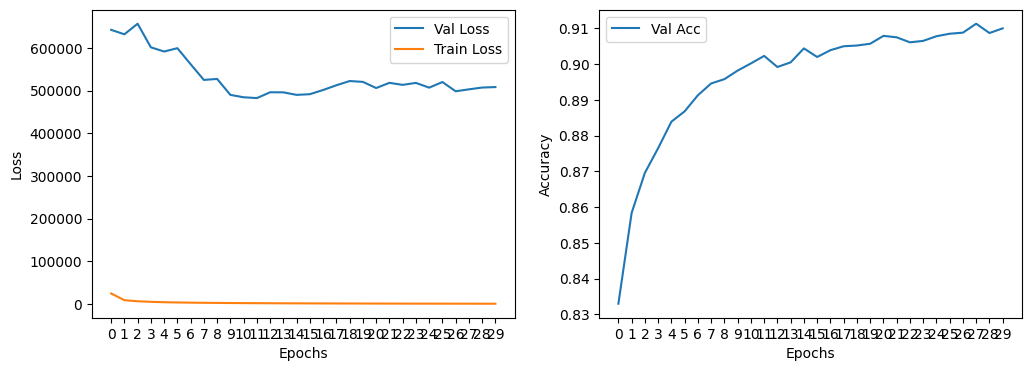

In [46]:
plot_results(history).show()

In [47]:
# def plot_results(history):
#     plt.figure(figsize=(12, 4))
#     epochs = len(history['val_loss'])
#     plt.subplot(1, 2, 1)
#     plt.plot(range(epochs), history['val_loss'], label='Val Loss')
#     plt.plot(range(epochs), history['train_loss'], label='Train Loss')
#     plt.xticks(list(range(epochs)))
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.legend()
    
    
#     plt.subplot(1, 2, 2)
#     plt.plot(range(epochs), history['val_acc'], label='Val Acc')
#     plt.xticks(list(range(epochs)))
#     plt.xlabel('Epochs')
#     plt.ylabel('Accuracy')
#     plt.legend()
#     return plt

In [48]:
# Assuming you have the trained network and test dataset available
preds = network.predict(x_test)
test_accuracy = np.mean(np.argmax(y_test, axis=1) == preds.numpy())

print("Test Accuracy: {:.2%}".format(test_accuracy))


Test Accuracy: 91.00%


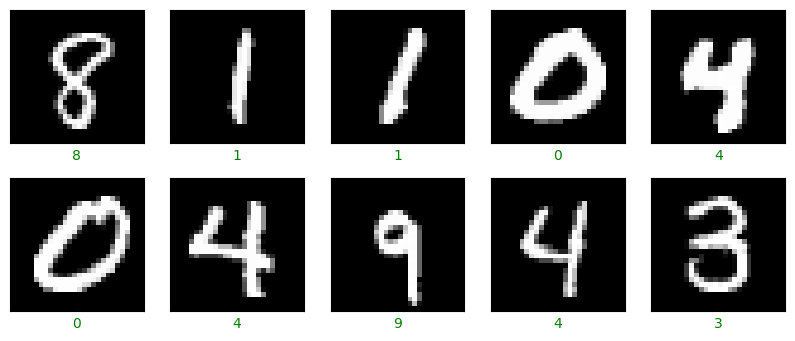

In [49]:
plot_random_sample(x_test, y_test, preds.numpy()).show()